In [1]:
import pandas as pd
df= pd.read_csv (r'Visa_Data.csv')
df.shape

(575582, 29)

In [2]:
df['EMPLOYMENT_START_DATE'] = pd.to_datetime(df['EMPLOYMENT_START_DATE'])
df['EMPLOYMENT_END_DATE'] = pd.to_datetime(df['EMPLOYMENT_END_DATE'])

#df['DAYS_PROCESS'] = df['EMPLOYMENT_END_DATE'].sub(df['EMPLOYMENT_START_DATE'], axis=0)
#df['DAYS_PROCESS'] = df['DAYS_PROCESS'] / np.timedelta64(1, 'D')

df['DAYS_PROCESS'] = abs((df['EMPLOYMENT_START_DATE'] - df['EMPLOYMENT_END_DATE']).dt.days)

df.head()  

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,DAYS_PROCESS
0,I-200-17073-999091,CERTIFIED,H-1B,2017-07-01,2020-06-30,"LONE STAR GLOBAL ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,...,Year,Level IV,1025000.0,1025000.0,Year,N,N,DALLAS,TX,1095.0
1,I-200-17080-322151,CERTIFIED,H-1B,2017-07-01,2020-06-30,"LONE STAR NORTH AMERICA ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,...,Year,Level IV,1025000.0,1025000.0,Year,N,N,DALLAS,TX,1095.0
2,I-200-17081-110694,DENIED,H-1B,2017-07-01,2020-06-30,"LONE STAR GLOBAL ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,...,Year,Level IV,1025000.0,1025000.0,Year,N,N,NEW YORK,TX,1095.0
3,I-200-17083-430434,CERTIFIED,H-1B,2017-07-01,2020-06-30,"LONE STAR GLOBAL ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,...,Year,Level IV,1025000.0,1025000.0,Year,N,N,NEW YORK,NY,1095.0
4,I-200-17131-986807,CERTIFIED,H-1B,2017-05-20,2020-05-19,GEISINGER CLINIC,DANVILLE,PA,Y,"PHYSICIAN, NEURO AND ENDOVASCULAR SURGERY",...,Year,Level IV,712500.0,712500.0,Year,N,N,DANVILLE,PA,1095.0


In [3]:
df.dtypes

CASE_NUMBER                            object
CASE_STATUS                            object
VISA_CLASS                             object
EMPLOYMENT_START_DATE          datetime64[ns]
EMPLOYMENT_END_DATE            datetime64[ns]
EMPLOYER_NAME                          object
EMPLOYER_CITY                          object
EMPLOYER_STATE                         object
AGENT_REPRESENTING_EMPLOYER            object
JOB_TITLE                              object
SOC_NAME                               object
TOTAL_WORKERS                           int64
NEW_EMPLOYMENT                          int64
CONTINUED_EMPLOYMENT                    int64
CHANGE_PREVIOUS_EMPLOYMENT              int64
NEW_CONCURRENT_EMPLOYMENT               int64
CHANGE_EMPLOYER                         int64
FULL_TIME_POSITION                     object
ANNUALIZED_PREVAILING_WAGE            float64
PREVAILING_WAGE                       float64
PW_UNIT_OF_PAY                         object
PW_WAGE_LEVEL                     

In [4]:
VisaStatus_df = df.groupby(['WAGE_UNIT_OF_PAY']).size().reset_index(name='counts')
print(VisaStatus_df)

  WAGE_UNIT_OF_PAY  counts
0        Bi-Weekly      88
1             Hour   22350
2            Month     361
3             Week     137
4             Year  552644


In [5]:
col_types = df.dtypes
col_types.head(53)
df.head(3)

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,DAYS_PROCESS
0,I-200-17073-999091,CERTIFIED,H-1B,2017-07-01,2020-06-30,"LONE STAR GLOBAL ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,...,Year,Level IV,1025000.0,1025000.0,Year,N,N,DALLAS,TX,1095.0
1,I-200-17080-322151,CERTIFIED,H-1B,2017-07-01,2020-06-30,"LONE STAR NORTH AMERICA ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,...,Year,Level IV,1025000.0,1025000.0,Year,N,N,DALLAS,TX,1095.0
2,I-200-17081-110694,DENIED,H-1B,2017-07-01,2020-06-30,"LONE STAR GLOBAL ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,...,Year,Level IV,1025000.0,1025000.0,Year,N,N,NEW YORK,TX,1095.0


In [6]:
#df.isnull().sum()

In [7]:
df = df.dropna(subset=['EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE','EMPLOYER_NAME',
                         'AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_NAME',
                        'PREVAILING_WAGE','PW_UNIT_OF_PAY','WAGE_UNIT_OF_PAY',
                        'EMPLOYER_CITY','WAGE_UNIT_OF_PAY','WILLFUL_VIOLATOR',
                         'WORKSITE_CITY','WILLFUL_VIOLATOR'])

In [8]:
df.shape

(488395, 30)

In [9]:
df.to_csv(r'/Users/patriciaattah/anaconda_files/yelp_dataset/cleaned_Visa_Data.csv')
df.isnull().sum()

CASE_NUMBER                    0
CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYMENT_START_DATE          0
EMPLOYMENT_END_DATE            0
EMPLOYER_NAME                  0
EMPLOYER_CITY                  0
EMPLOYER_STATE                 0
AGENT_REPRESENTING_EMPLOYER    0
JOB_TITLE                      0
SOC_NAME                       0
TOTAL_WORKERS                  0
NEW_EMPLOYMENT                 0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
FULL_TIME_POSITION             0
ANNUALIZED_PREVAILING_WAGE     0
PREVAILING_WAGE                0
PW_UNIT_OF_PAY                 0
PW_WAGE_LEVEL                  0
ANNUALIZED_WAGE_RATE_OF_PAY    0
WAGE_RATE_OF_PAY               0
WAGE_UNIT_OF_PAY               0
H1B_DEPENDENT                  0
WILLFUL_VIOLATOR               0
WORKSITE_CITY                  0
WORKSITE_STATE                 0
DAYS_PROCESS                   0
dtype: int

In [10]:
pd.set_option('display.max_columns', 100)
df.shape

(488395, 30)

In [11]:
VisaStatus_df = df.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(VisaStatus_df)

           CASE_STATUS  counts
0            CERTIFIED  440499
1  CERTIFIED-WITHDRAWN   42100
2               DENIED    5796


In [12]:
#conda install -c conda-forge imbalanced-learn

In [13]:
employer_count = df['EMPLOYER_NAME'].unique()
count=0
for i in employer_count:
    count += 1
print(count)
print(df.shape)

56579
(488395, 30)


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [15]:
features = ['EMPLOYER_NAME', 'EMPLOYER_CITY','SOC_NAME',
           'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE',
            'WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_STATE','PW_UNIT_OF_PAY',
           'PW_WAGE_LEVEL','WAGE_UNIT_OF_PAY','H1B_DEPENDENT']
encoded = []

for f in features:
    df[f+'_CODE'] = LabelEncoder().fit_transform(df[f])
    b=f+'_CODE'
    encoded.append(b)
    
df = df.drop(['VISA_CLASS','FULL_TIME_POSITION',
             'EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE',
             'CASE_NUMBER'], axis=1)

df.head(3)

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_NAME,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,ANNUALIZED_PREVAILING_WAGE,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,DAYS_PROCESS,EMPLOYER_NAME_CODE,EMPLOYER_CITY_CODE,SOC_NAME_CODE,EMPLOYER_STATE_CODE,AGENT_REPRESENTING_EMPLOYER_CODE,JOB_TITLE_CODE,WILLFUL_VIOLATOR_CODE,WORKSITE_CITY_CODE,WORKSITE_STATE_CODE,PW_UNIT_OF_PAY_CODE,PW_WAGE_LEVEL_CODE,WAGE_UNIT_OF_PAY_CODE,H1B_DEPENDENT_CODE
0,CERTIFIED,"LONE STAR GLOBAL ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,FINANCIAL MANAGERS,1,0,0,1,0,0,180502.0,180502.0,Year,Level IV,1025000.0,1025000.0,Year,N,N,DALLAS,TX,1095.0,29720,904,326,46,1,21882,0,1482,42,4,3,4,0
1,CERTIFIED,"LONE STAR NORTH AMERICA ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,FINANCIAL MANAGERS,1,0,0,1,0,0,180502.0,180502.0,Year,Level IV,1025000.0,1025000.0,Year,N,N,DALLAS,TX,1095.0,29722,904,326,46,1,21882,0,1482,42,4,3,4,0
2,DENIED,"LONE STAR GLOBAL ACQUISITIONS, LLC",DALLAS,TX,Y,EXECUTIVE VP & CHIEF OF STAFF,FINANCIAL MANAGERS,1,0,0,0,0,1,231899.0,231899.0,Year,Level IV,1025000.0,1025000.0,Year,N,N,NEW YORK,TX,1095.0,29720,904,326,46,1,21882,0,4249,42,4,3,4,0


In [16]:
df.to_csv(r'/Users/patriciaattah/anaconda_files/yelp_dataset/Encoded_Unbalanced_Visa_Data.csv')

In [17]:
#df['EMPLOYMENT_START_DATE']= pd.to_datetime(df['EMPLOYMENT_START_DATE'])

df2=df.sort_values(by=['CASE_STATUS'])
df2=df2.iloc[400000:, :]

yy = df2['CASE_STATUS']
X = df2.drop(['CASE_STATUS','EMPLOYER_NAME', 'EMPLOYER_CITY',
             'SOC_NAME','EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE',
            'WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_STATE',
            'PW_UNIT_OF_PAY','PW_WAGE_LEVEL','WAGE_UNIT_OF_PAY','H1B_DEPENDENT',
            'WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_STATE'], axis=1)


VisaStatus_df = df2.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(VisaStatus_df)

#print(ff)

           CASE_STATUS  counts
0            CERTIFIED   40499
1  CERTIFIED-WITHDRAWN   42100
2               DENIED    5796


In [18]:
print(df.shape)
print(df2.shape)

(488395, 38)
(88395, 38)


In [19]:
X.columns

Index(['TOTAL_WORKERS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'ANNUALIZED_PREVAILING_WAGE', 'PREVAILING_WAGE',
       'ANNUALIZED_WAGE_RATE_OF_PAY', 'WAGE_RATE_OF_PAY', 'DAYS_PROCESS',
       'EMPLOYER_NAME_CODE', 'EMPLOYER_CITY_CODE', 'SOC_NAME_CODE',
       'EMPLOYER_STATE_CODE', 'AGENT_REPRESENTING_EMPLOYER_CODE',
       'JOB_TITLE_CODE', 'WILLFUL_VIOLATOR_CODE', 'WORKSITE_CITY_CODE',
       'WORKSITE_STATE_CODE', 'PW_UNIT_OF_PAY_CODE', 'PW_WAGE_LEVEL_CODE',
       'WAGE_UNIT_OF_PAY_CODE', 'H1B_DEPENDENT_CODE'],
      dtype='object')

In [20]:
#df.dtypes

In [21]:
y = LabelEncoder().fit_transform(yy)
[print(y,print(yy))]

228389    CERTIFIED
228390    CERTIFIED
228391    CERTIFIED
228392    CERTIFIED
228393    CERTIFIED
            ...    
490512       DENIED
490513       DENIED
14216        DENIED
490579       DENIED
486182       DENIED
Name: CASE_STATUS, Length: 88395, dtype: object
[0 0 0 ... 2 2 2] None


[None]

In [22]:
from collections import Counter


oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=42100 (33.333%)
Class=1, n=42100 (33.333%)
Class=2, n=42100 (33.333%)


In [23]:
coded_df = X
coded_df['CASE_STATUS_CODE'] = y

VisaStatus_df = coded_df.groupby(['CASE_STATUS_CODE']).size().reset_index(name='counts')
print(VisaStatus_df)

   CASE_STATUS_CODE  counts
0                 0   42100
1                 1   42100
2                 2   42100


In [24]:
coded_df.to_csv(r'/Users/patriciaattah/anaconda_files/yelp_dataset/Numeric_Balanced_Visa_Data.csv')

In [25]:
recode = list(zip(encoded,features))
recoded = []
for i in recode:
    recoded.append(list(i))
recoded

[['EMPLOYER_NAME_CODE', 'EMPLOYER_NAME'],
 ['EMPLOYER_CITY_CODE', 'EMPLOYER_CITY'],
 ['SOC_NAME_CODE', 'SOC_NAME'],
 ['EMPLOYER_STATE_CODE', 'EMPLOYER_STATE'],
 ['AGENT_REPRESENTING_EMPLOYER_CODE', 'AGENT_REPRESENTING_EMPLOYER'],
 ['JOB_TITLE_CODE', 'JOB_TITLE'],
 ['WILLFUL_VIOLATOR_CODE', 'WILLFUL_VIOLATOR'],
 ['WORKSITE_CITY_CODE', 'WORKSITE_CITY'],
 ['WORKSITE_STATE_CODE', 'WORKSITE_STATE'],
 ['PW_UNIT_OF_PAY_CODE', 'PW_UNIT_OF_PAY'],
 ['PW_WAGE_LEVEL_CODE', 'PW_WAGE_LEVEL'],
 ['WAGE_UNIT_OF_PAY_CODE', 'WAGE_UNIT_OF_PAY'],
 ['H1B_DEPENDENT_CODE', 'H1B_DEPENDENT']]

In [26]:
coded_df.head()

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,ANNUALIZED_PREVAILING_WAGE,PREVAILING_WAGE,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,DAYS_PROCESS,EMPLOYER_NAME_CODE,EMPLOYER_CITY_CODE,SOC_NAME_CODE,EMPLOYER_STATE_CODE,AGENT_REPRESENTING_EMPLOYER_CODE,JOB_TITLE_CODE,WILLFUL_VIOLATOR_CODE,WORKSITE_CITY_CODE,WORKSITE_STATE_CODE,PW_UNIT_OF_PAY_CODE,PW_WAGE_LEVEL_CODE,WAGE_UNIT_OF_PAY_CODE,H1B_DEPENDENT_CODE,CASE_STATUS_CODE
0,1,1,0,0,0,0,65666.0,65666.0,65666.0,65666.0,1095.0,41849,264,171,51,0,63038,0,503,47,4,1,4,0,0
1,1,1,0,0,0,0,94557.0,94557.0,110000.0,110000.0,1095.0,36986,3361,171,48,1,56570,0,5129,44,4,1,4,0,0
2,1,1,0,0,0,0,90813.0,90813.0,115000.0,115000.0,1096.0,5387,2784,683,36,1,71132,0,4249,33,4,1,4,0,0
3,1,1,0,0,0,0,56805.0,56805.0,60000.0,60000.0,1096.0,21541,2784,601,36,1,327,0,4249,33,4,1,4,0,0
4,1,1,0,0,0,0,61610.0,61610.0,72000.0,72000.0,1095.0,44996,3084,171,6,1,44026,0,4712,4,4,1,4,1,0


In [27]:
codes = []
for i in recoded:
    temp = df[i]
    codes.append(temp.drop_duplicates())
codes[4].head()

,AGENT_REPRESENTING_EMPLOYER_CODE,AGENT_REPRESENTING_EMPLOYER
0,1,Y
153,0,N


In [28]:
print(len(codes), len(recoded))

13 13


In [29]:
import numpy as np

coded_data = coded_df.merge(codes[0], on='EMPLOYER_NAME_CODE', how = 'left')
coded_data = coded_data.merge(codes[1], on='EMPLOYER_CITY_CODE', how = 'left')
coded_data = coded_data.merge(codes[2], on='SOC_NAME_CODE', how = 'left')
coded_data = coded_data.merge(codes[3], on='EMPLOYER_STATE_CODE', how = 'left')
coded_data = coded_data.merge(codes[4], on='AGENT_REPRESENTING_EMPLOYER_CODE', how = 'left')
coded_data = coded_data.merge(codes[5], on='JOB_TITLE_CODE', how = 'left')
coded_data = coded_data.merge(codes[6], on='WILLFUL_VIOLATOR_CODE', how = 'left')
coded_data = coded_data.merge(codes[7], on='WORKSITE_CITY_CODE', how = 'left')
coded_data = coded_data.merge(codes[8], on='WORKSITE_STATE_CODE', how = 'left')
coded_data = coded_data.merge(codes[9], on='PW_UNIT_OF_PAY_CODE', how = 'left')
coded_data = coded_data.merge(codes[10], on='PW_WAGE_LEVEL_CODE', how = 'left')
coded_data = coded_data.merge(codes[11], on='WAGE_UNIT_OF_PAY_CODE', how = 'left')
coded_data = coded_data.merge(codes[12], on='H1B_DEPENDENT_CODE', how = 'left')

coded_data['CASE_STATUS'] = np.select([coded_data.CASE_STATUS_CODE == 0, coded_data.CASE_STATUS_CODE == 1], 
                        ['CERTIFIED', 'CERTIFIED-WITHDRAWN'], 
                        default='DENIED')

VisaStatus_df = coded_data.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(VisaStatus_df)

           CASE_STATUS  counts
0            CERTIFIED   42100
1  CERTIFIED-WITHDRAWN   42100
2               DENIED   42100


In [30]:
coded_data.to_csv(r'/Users/patriciaattah/anaconda_files/yelp_dataset/Balanced_Visa_Data.csv')

In [31]:
coded_data.shape

(126300, 39)

<AxesSubplot:title={'center':'count (target)'}>

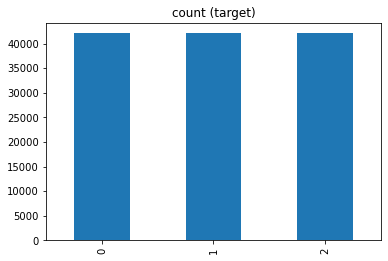

In [32]:
coded_data['CASE_STATUS_CODE'].value_counts().plot(kind='bar', title='count (target)')

In [33]:
# x and y given as DataFrame columns


In [34]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates